In [1]:
import cnidcal.cnidcal as cdc
import numpy as np
from numpy import dot, cross, pi, square, array
from numpy.linalg import det, norm, inv
from cnidcal.celldraw import cellsdrawer

# Inpute two primitive lattices, a rotation matrix

In [2]:
lattice_1 = np.load('lattice_1.npy')
lattice_2 = np.load('lattice_2.npy')
D = np.load('D.npy')
R = np.load('R.npy')
lattice_2 = dot(D, lattice_2)

# Get the miller indices of the interface plane expressed in the primitive lattice (you can obtain this by transfoming the conventional miller indices)

In [3]:
conv_lattice_1 = array([[ 5.46872800e+00, -3.34863012e-16,  0.00000000e+00],
                        [ 0.00000000e+00,  5.46872800e+00,  0.00000000e+00],
                        [ 3.34863012e-16,  3.34863012e-16,  5.46872800e+00]])

miller_ind_pri = cdc.get_primitive_hkl(hkl = [1,0,0], C_lattice = conv_lattice_1, P_lattice = lattice_1)
miller_ind_pri

array([-1, -1,  0])

# Get the two plane bases

In [4]:
PB_1, PB_2 = cdc.get_two_bases(lattice_1, lattice_2, R, miller_ind_pri)
PB_1, PB_2

(array([[-1.67431506e-16,  0.00000000e+00],
        [ 2.73436400e+00, -2.73436400e+00],
        [ 2.73436400e+00,  2.73436400e+00]]),
 array([[ 0.00000000e+00, -7.81347028e-16],
        [ 5.46872800e+00,  1.38771365e-16],
        [ 1.47911420e-31,  2.55207307e+01]]))

# Compute the two-D CSL & CNID, and you can express them in the primitive lattice or conventional lattice frame

In [5]:
CSL = cdc.search_CSL(PB_1, PB_2, 20)
CNID = cdc.searchcnid(PB_1, PB_2, 20)

In [6]:
#CSL expressed in the primitive and conventional cell
CSL_in_P = np.round(cdc.get_coef_exp_ltc(lattice_1, CSL),5)
CSL_in_C = np.round(cdc.get_coef_exp_ltc(conv_lattice_1, CSL),5)
CSL_in_P, CSL_in_C

(array([[ -1., -14.],
        [  1.,  14.],
        [ -1.,  14.]]),
 array([[  0.,   0.],
        [  1.,   0.],
        [ -0., -14.]]))

In [7]:
#CNID expressed in primitive lattice 1
CNID_in_P = cdc.get_coef_exp_ltc(lattice_1, CNID)
cdc.get_fraction_basis(CNID_in_P)

array([['1/3', '-1/3'],
       ['-1/3', '1/3'],
       ['-1/3', '-2/3']], dtype='<U21')

In [8]:
#CNID expressed in conventional lattice 1
CNID_in_C = cdc.get_coef_exp_ltc(conv_lattice_1, CNID)
cdc.get_fraction_basis(CNID_in_C)

array([['0/3', '0/6'],
       ['0/3', '3/6'],
       ['1/3', '1/6']], dtype='<U21')

In [9]:
#CNID expressed in lattice 2
CNID_in_P = cdc.get_coef_exp_ltc(dot(R,lattice_2), CNID)
cdc.get_fraction_basis(CNID_in_P)

array([['0/14', '-14/28'],
       ['0/14', '14/28'],
       ['1/14', '1/28']], dtype='<U21')

# Visualize the cells

A drawer class containing information of all cells

In [10]:
my_cells = cellsdrawer(PB_1, PB_2, CSL, CNID, 20)

The CSL lattice of the two plane basis

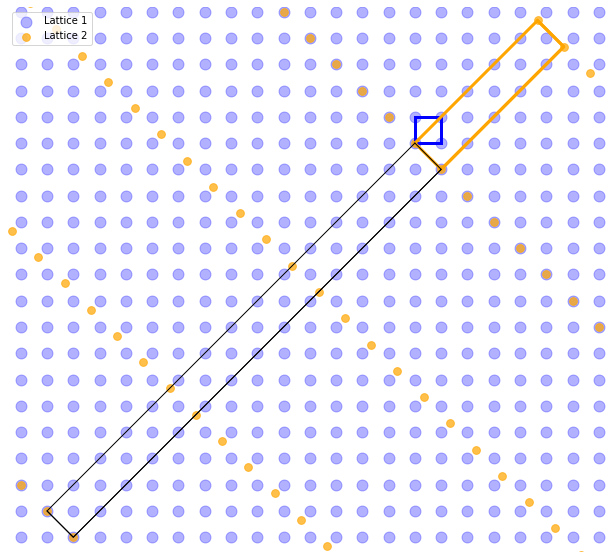

In [44]:
#Show the two lattices and their CSL
my_cells.draw_direct(xlow = -60, xhigh = 28, ylow = -60, 
                     yhigh = 20, figsize_x = 20, figsize_y = 10, size_LP_1=120, size_LP_2=60, show_legend=True, save= True)

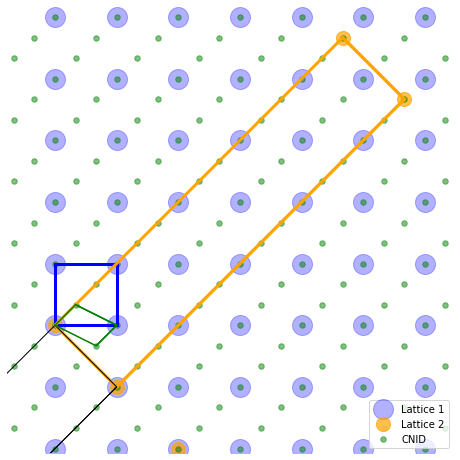

In [43]:
#Show the zoomed figure and DSC
my_cells.draw_direct(xlow = -3, xhigh = 25, ylow = -8, yhigh = 20, \
                     figsize_x = 8, figsize_y = 10, size_LP_1 = 400, \
                     size_LP_2 = 200, show_CNID_points = True, show_CNID_cell = True, show_legend = True, save = True)

The CSL lattice of the two reciprocal lattices